# Explore here

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

In [54]:
total_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [55]:
total_data.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], axis = 1, inplace = True)

In [56]:
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [57]:
from sklearn.model_selection import train_test_split

In [70]:
X = total_data

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 24)

In [59]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [60]:
model = KMeans(n_clusters = 6, random_state = 24)
model.fit(X_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=24)

In [61]:
cluster_train = model.predict(X_train)
cluster_test = model.predict(X_test)

In [62]:
X_train["Cluster"] = cluster_train
X_test["Cluster"] = cluster_test

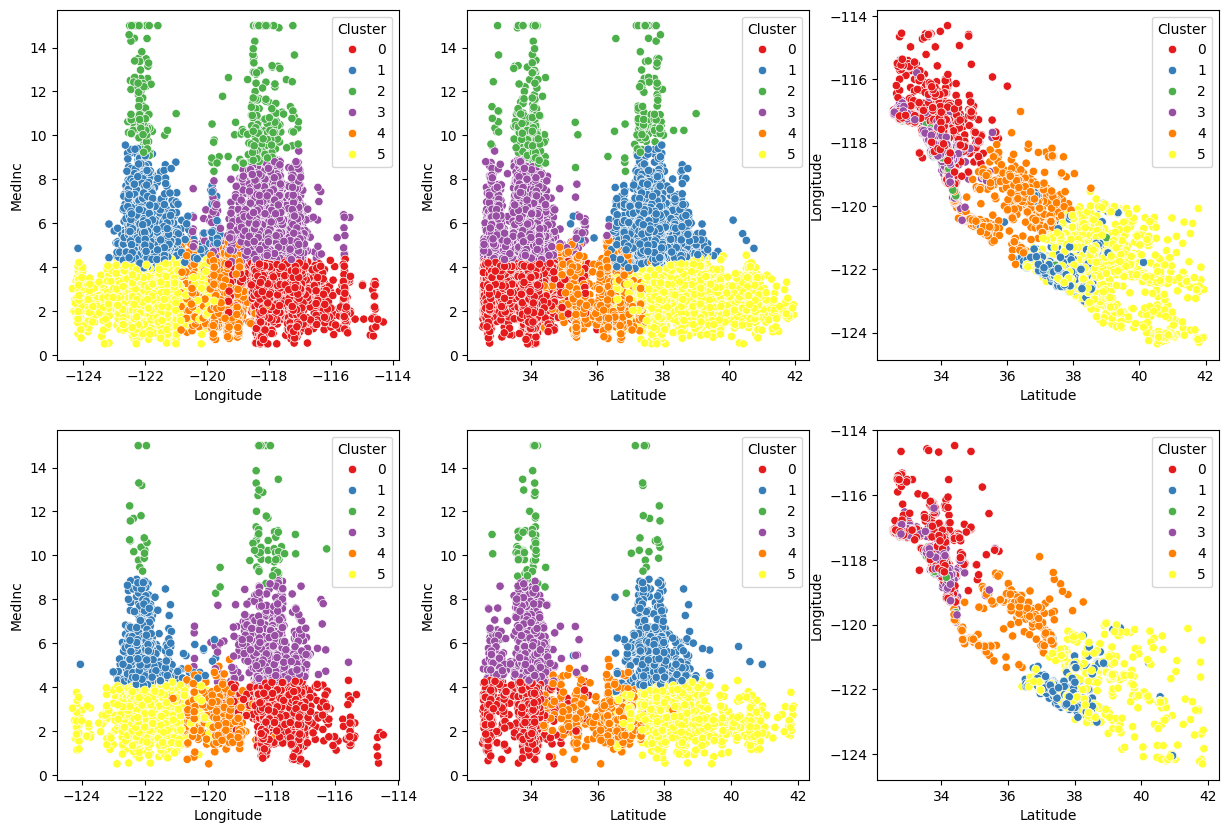

In [63]:
fig, axis = plt.subplots(2,3, figsize = (15,10))

sns.scatterplot(ax = axis[0,0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,0], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,2], data = X_test, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.show()

### KNN

In [64]:
y_train = X_train["Cluster"]
X_train = X_train.drop("Cluster", axis=1)

y_test = X_test["Cluster"]
X_test = X_test.drop("Cluster", axis=1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred_train = model.predict(X_train)
y_pred_train

array([5, 0, 3, ..., 0, 1, 5], dtype=int32)

In [67]:
y_pred = model.predict(X_test)
y_pred

array([3, 0, 3, ..., 1, 3, 5], dtype=int32)

In [69]:
from sklearn.metrics import accuracy_score

print(f"Accuracy test = {accuracy_score(y_test, y_pred)}")
print(f"Accuracy train = {accuracy_score(y_train, y_pred_train)}")

Accuracy test = 0.9932170542635659
Accuracy train = 0.9958212209302325
